# **COVID-19 Global Data Tracker**

![covid_image](https://www.amprogress.org/wp-content/uploads/2020/03/Case-Surveillance-4-1200x800.jpeg)

From [amprogress](https://www.amprogress.org/covid-19-resources/covid-19-photo-library/)

### **Introduction** 

The COVID-19 pandemic has profoundly impacted global health systems, economies, and societies. Since its emergence, countries around the world have experienced varying levels of infection rates, mortality, and recovery. These differences have been shaped by multiple factors, including healthcare infrastructure, population demographics, vaccination rates, and socioeconomic conditions. To better understand and respond to the ongoing effects of COVID-19, there is a need for comprehensive data analysis that explores patterns, trends, and correlations across different regions and indicators.

### **Project Description**

This project presents a global data-driven analysis of the COVID-19 pandemic using country-level data on infections, deaths, vaccination progress, demographics, and socioeconomic factors. By leveraging visualizations, statistical summaries, and correlation analysis, the project aims to uncover insights about how the pandemic evolved globally and regionally. Special attention is given to differences in mortality rates, the impact of vaccination, and the role of demographic and economic variables in shaping pandemic outcomes. The analysis supports evidence-based recommendations for future preparedness and policy interventions.

### **Problem Statement**

Despite widespread data availability, significant disparities remain in how countries experienced and responded to the COVID-19 pandemic. Understanding these variations is crucial for improving global public health strategies, especially in low-resource settings. There is a pressing need to analyze these disparities through a unified framework that integrates health, demographic, and socioeconomic data. This project addresses the challenge of identifying and interpreting global patterns in COVID-19 outcomes to guide targeted interventions and equitable resource allocation.

### **Main Objectives**

- To analyze and visualize the global distribution and progression of COVID-19 cases, deaths, and vaccination efforts across countries and continents.

- To examine the influence of demographic and socioeconomic factors (e.g., age structure, GDP per capita, population density) on COVID-19 outcomes such as fatality rate and vaccination coverage.

- To provide actionable recommendations for improving healthcare preparedness, vaccination equity, and pandemic response strategies based on identified trends and correlations.


### **Import Libraries**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Ensure exportable rendering
pio.renderers.default = 'iframe'

### **Loading the File**

In [4]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')
# Display the first few rows of the dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
91016,ZWE,Africa,Zimbabwe,2021-05-15,38554.0,19.0,20.000,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91017,ZWE,Africa,Zimbabwe,2021-05-16,38560.0,6.0,20.143,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91018,ZWE,Africa,Zimbabwe,2021-05-17,38572.0,12.0,19.857,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91019,ZWE,Africa,Zimbabwe,2021-05-18,38595.0,23.0,21.000,1583.0,1.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91020,ZWE,Africa,Zimbabwe,2021-05-19,38612.0,17.0,20.857,1583.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91021,ZWE,Africa,Zimbabwe,2021-05-20,38635.0,23.0,20.571,1585.0,2.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91022,ZWE,Africa,Zimbabwe,2021-05-21,38664.0,29.0,18.429,1586.0,1.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91023,ZWE,Africa,Zimbabwe,2021-05-22,38679.0,15.0,17.857,1586.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91024,ZWE,Africa,Zimbabwe,2021-05-23,38682.0,3.0,17.429,1586.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91025,ZWE,Africa,Zimbabwe,2021-05-24,38696.0,14.0,17.714,1586.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


### **Data Preliminaries**

In [6]:
# Dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (91026, 59)


In [7]:
# Check the number of feature columns
print(f"Number of feature columns: {len(df.columns)}")

Number of feature columns: 59


In [8]:
# Check the number of rows in the dataset   
print(f"Number of rows in the dataset: {len(df)}")

Number of rows in the dataset: 91026


In [9]:
# Check on memory usage
memory_usage = df.memory_usage(deep=True)
# Convert memory usage to MB for better readability 
memory_usage = (memory_usage / (1024 ** 2)).sort_values(ascending=False)  # Convert to MB
print(f"Memory usage (in MB):\n{memory_usage}")

Memory usage (in MB):
date                                     5.816214
location                                 5.685067
continent                                5.413410
iso_code                                 5.231891
tests_units                              4.627760
new_tests_smoothed                       0.694473
new_vaccinations_smoothed                0.694473
new_vaccinations_smoothed_per_million    0.694473
people_fully_vaccinated_per_hundred      0.694473
people_vaccinated_per_hundred            0.694473
total_vaccinations_per_hundred           0.694473
people_vaccinated                        0.694473
new_vaccinations                         0.694473
people_fully_vaccinated                  0.694473
population                               0.694473
total_vaccinations                       0.694473
stringency_index                         0.694473
median_age                               0.694473
population_density                       0.694473
positive_rate               

In [10]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91026 entries, 0 to 91025
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               91026 non-null  object 
 1   continent                              86699 non-null  object 
 2   location                               91026 non-null  object 
 3   date                                   91026 non-null  object 
 4   total_cases                            88336 non-null  float64
 5   new_cases                              88335 non-null  float64
 6   new_cases_smoothed                     87328 non-null  float64
 7   total_deaths                           78484 non-null  float64
 8   new_deaths                             78642 non-null  float64
 9   new_deaths_smoothed                    87328 non-null  float64
 10  total_cases_per_million                87863 non-null  float64
 11  ne

In [11]:
# Check missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

continent                                 4327
total_cases                               2690
new_cases                                 2691
new_cases_smoothed                        3698
total_deaths                             12542
new_deaths                               12384
new_deaths_smoothed                       3698
total_cases_per_million                   3163
new_cases_per_million                     3164
new_cases_smoothed_per_million            4166
total_deaths_per_million                 13002
new_deaths_per_million                   12844
new_deaths_smoothed_per_million           4166
reproduction_rate                        17659
icu_patients                             81850
icu_patients_per_million                 81850
hosp_patients                            79611
hosp_patients_per_million                79611
weekly_icu_admissions                    90196
weekly_icu_admissions_per_million        90196
weekly_hosp_admissions                   89580
weekly_hosp_a

In [12]:
# Check on duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [13]:
# Check column names
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [14]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.833600e+04,88335.000000,87328.000000,7.848400e+04,78642.000000,87328.000000,87863.000000,87862.000000,86860.000000,78024.000000,...,81972.000000,55479.000000,82163.000000,84019.000000,64338.000000,63393.000000,41288.000000,74934.000000,86432.000000,82351.000000
mean,9.151563e+05,6033.622743,6046.602763,2.479388e+04,141.643664,126.433556,11220.125030,75.755854,75.892982,245.707748,...,19296.887209,13.373408,258.044821,7.876693,10.537168,32.666667,50.881769,3.029373,73.231286,0.727804
std,6.322927e+06,38089.918376,37733.973544,1.476747e+05,777.835074,717.118005,21227.092043,196.149038,155.744273,429.926840,...,19954.883034,19.951487,118.858771,4.062795,10.425066,13.472618,31.761800,2.461568,7.564003,0.150413
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1.055000e+03,2.000000,7.143000,4.800000e+01,0.000000,0.000000,220.891500,0.202000,1.212750,7.296750,...,4466.507000,0.600000,167.295000,5.310000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,1.161100e+04,70.000000,87.286000,3.330000e+02,2.000000,1.286000,1514.078000,7.846000,10.428000,43.718000,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000
75%,1.232172e+05,783.000000,819.714000,3.229250e+03,18.000000,14.000000,11074.352500,70.163500,78.714500,267.625250,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000
max,1.673164e+08,905992.000000,826374.286000,3.473036e+06,17906.000000,14436.286000,175616.385000,18293.675000,4083.500000,3059.931000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000


### **Data Cleaning**

In [15]:
# Select columns based on dtype
numeric_columns = df.select_dtypes(include=["number"]).columns.to_list()
# Display numeric columns
print(f"Numeric columns: {numeric_columns}")

Numeric columns: ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index', 'popula

In [16]:
# Check for minimum in numeric columns
min_values = df[numeric_columns].min().sort_values(ascending=True)

print(f"Minimum values:\n{min_values.head(15)}")


Minimum values:
new_tests                             -239172.000
new_cases                              -74347.000
new_cases_smoothed                      -6223.000
new_cases_per_million                   -2153.437
new_deaths                              -1918.000
new_cases_smoothed_per_million           -276.825
new_deaths_smoothed                      -232.143
new_deaths_per_million                    -76.445
new_tests_per_thousand                    -23.010
new_deaths_smoothed_per_million           -10.921
reproduction_rate                          -0.010
people_fully_vaccinated_per_hundred         0.000
total_vaccinations_per_hundred              0.000
total_tests_per_thousand                    0.000
new_vaccinations_smoothed                   0.000
dtype: float64


- Columns such as 'new_tests', 'new_cases', 'new_cases_smoothed', 'new_deaths', and others have negative minimum values.
- Negative values in these columns are not expected in the context of COVID-19 data (e.g., new cases or deaths cannot be negative).
- The next step is to correct these anomalies by replacing negative values with their absolute values in all numeric columns

In [17]:
# Replace negative values with their absolute values in all numeric columns
df[numeric_columns] = df[numeric_columns].abs()

In [18]:
new_min_values = df[numeric_columns].min().sort_values(ascending=True)

print(f"New minimum values:\n{new_min_values.head(15)}")

New minimum values:
new_tests_smoothed_per_thousand        0.0
weekly_hosp_admissions                 0.0
weekly_hosp_admissions_per_million     0.0
total_tests                            0.0
total_tests_per_thousand               0.0
new_tests_per_thousand                 0.0
new_tests_smoothed                     0.0
people_fully_vaccinated_per_hundred    0.0
positive_rate                          0.0
people_vaccinated                      0.0
stringency_index                       0.0
new_vaccinations                       0.0
new_vaccinations_smoothed              0.0
total_vaccinations_per_hundred         0.0
people_vaccinated_per_hundred          0.0
dtype: float64


In [19]:
# Relace NaN values with 0 in all numeric columns
df[numeric_columns] = df[numeric_columns].fillna(0)

In [20]:
# Check for null values
df[numeric_columns].isnull().sum()

total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
icu_patients                             0
icu_patients_per_million                 0
hosp_patients                            0
hosp_patients_per_million                0
weekly_icu_admissions                    0
weekly_icu_admissions_per_million        0
weekly_hosp_admissions                   0
weekly_hosp_admissions_per_million       0
new_tests                                0
total_tests                              0
total_tests

In [21]:
# Check for object columns
object_columns = df.select_dtypes(include=["object"]).columns.to_list()
# Display object columns
print(f"Object columns: {object_columns}")

Object columns: ['iso_code', 'continent', 'location', 'date', 'tests_units']


In [22]:
# Check % of null values for each object column
missing_values = df[object_columns].isnull().sum() / len(df) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(f"Missing values in object columns:\n{missing_values}")

Missing values in object columns:
tests_units    45.939622
continent       4.753587
dtype: float64


In [23]:
df.isna().sum().sort_values(ascending=False).head()

tests_units                        41817
continent                           4327
new_tests_smoothed_per_thousand        0
positive_rate                          0
tests_per_case                         0
dtype: int64

In [24]:
# Drop tests units column
df.drop(columns=["tests_units"], inplace=True)


In [25]:
# Drop null values in continent column
df.dropna(subset=["continent"], inplace=True)

In [26]:
# Check on the null values
df.isna().sum().sum()

0

### **Exploratory Data Analysis**

#### *Continent*

In [27]:
# Check for unique values in the 'continent' column
df['continent'].value_counts()

continent
Africa           23577
Asia             21744
Europe           21643
North America    11081
South America     5523
Oceania           3131
Name: count, dtype: int64

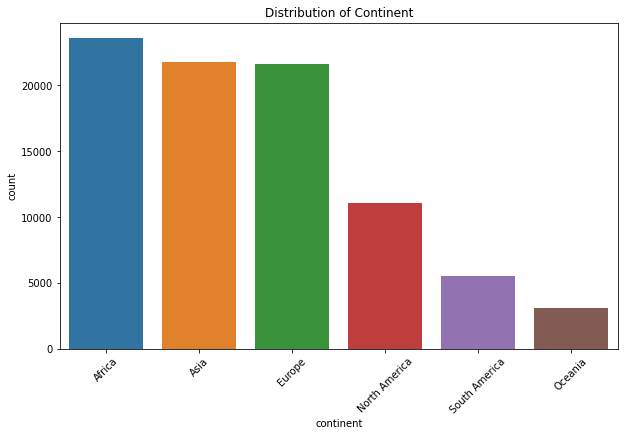

In [28]:
# Plotting the distribution of the continent column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='continent', order=df['continent'].value_counts().index)
plt.title('Distribution of Continent')  
plt.xticks(rotation=45)
plt.show()

**`Africa`** had highest COVID-19 cases with **`Oceania`** becoming the least with `3131`

#### *Cases vs. Deaths by Continent*

In [29]:
# Get total cases by continent as float (not formatted as string/object)
df.groupby('continent')['total_cases'].sum().sort_values(ascending=False)

continent
Europe           7.022733e+09
North America    6.816519e+09
Asia             6.329689e+09
South America    4.358574e+09
Africa           8.675026e+08
Oceania          1.095399e+07
Name: total_cases, dtype: float64

In [30]:
# Total death by continent
df.groupby('continent')['total_deaths'].sum().sort_values(ascending=False)

continent
Europe           185871865.0
North America    174272500.0
South America    122792695.0
Asia             101238112.0
Africa            22074592.0
Oceania             282249.0
Name: total_deaths, dtype: float64

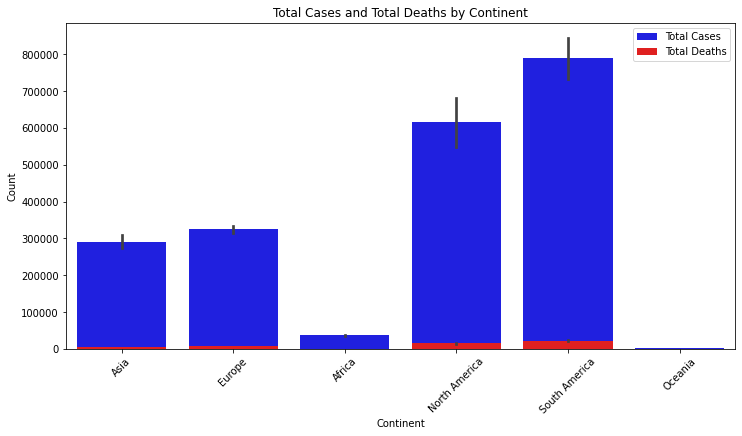

In [31]:
# Plot comparison of total cases and total deaths by continent
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='continent', y='total_cases', color='blue', label='Total Cases')
sns.barplot(data=df, x='continent', y='total_deaths', color='red', label='Total Deaths')
plt.title('Total Cases and Total Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Key Insights:**
- **Asia and Europe** have the highest total reported cases, followed by North America and South America.
- **Africa** and **Oceania** have significantly lower case and death counts compared to other continents.
- The death segment is much smaller than the case segment for all continents, reflecting that deaths are a small fraction of total cases.
- The relative size of the death segment compared to cases can hint at differences in fatality rates, healthcare quality, or reporting practices across continents.

This visualization helps compare the pandemic's impact across continents, highlighting both the scale of infections and the burden of mortality.

#### *Time Series Analysis*

In [32]:
# Time series analysis
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# Check the data type of the date column
print(f"Data type of date column: {df['date'].dtype}")

Data type of date column: datetime64[ns]


#### *1. Cases by Continent*

In [33]:
# Plot trends in COVID-19 cases over time by continent
def plot_trends_by_continent(df, continent):
    plt.figure(figsize=(14, 7))
    continent_data = df[df['continent'] == continent]
    sns.lineplot(data=continent_data, x='date', y='total_cases', label=continent)
    plt.title(f'Trends in COVID-19 Cases Over Time in {continent}')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.legend()
    plt.show()

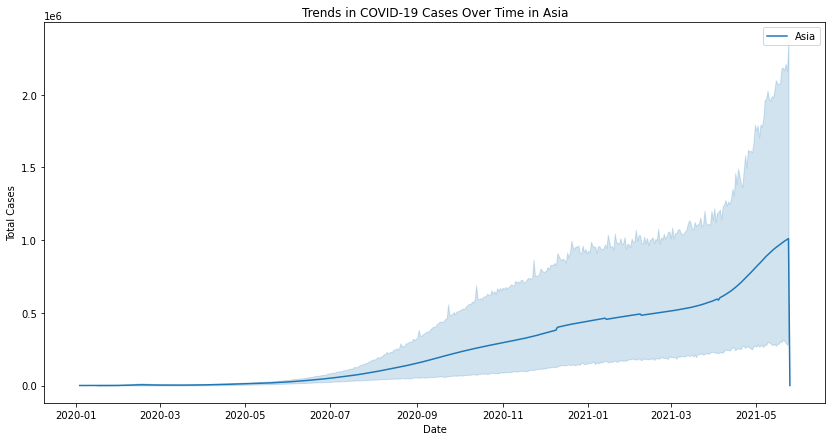

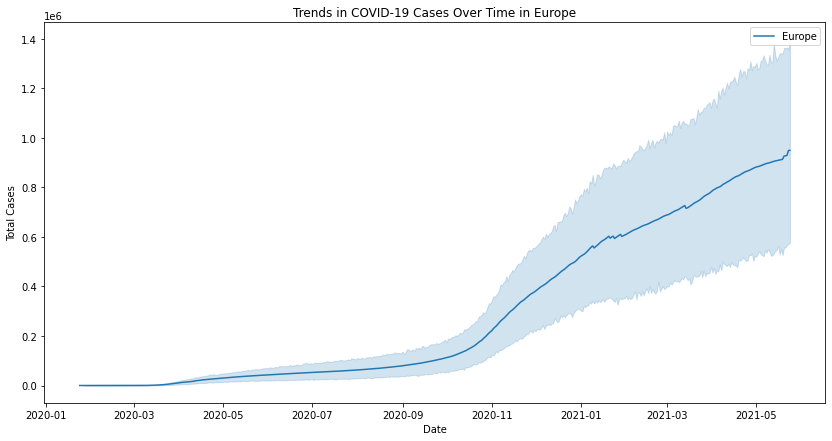

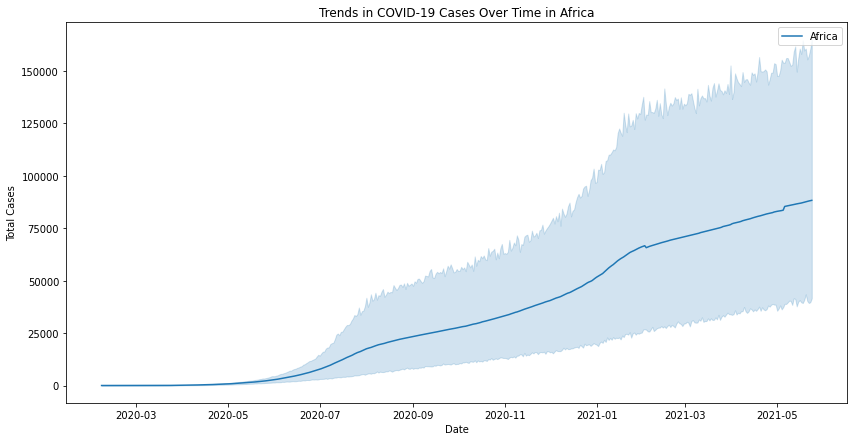

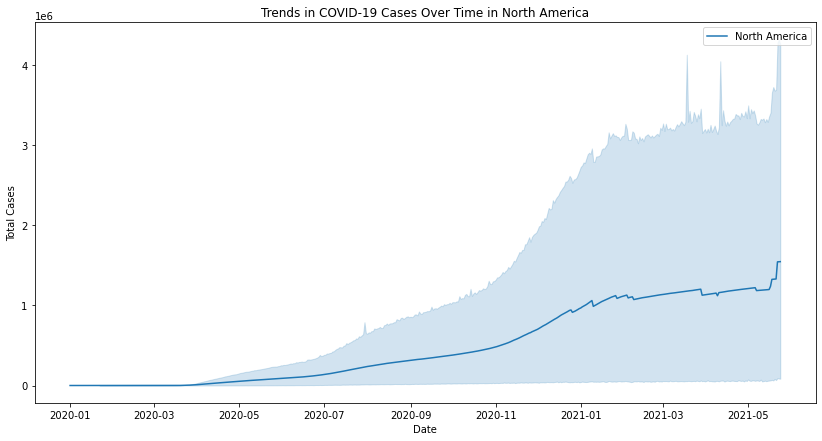

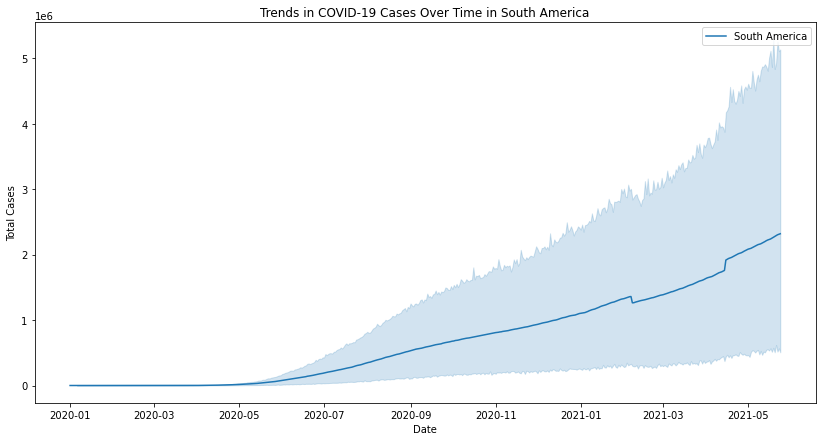

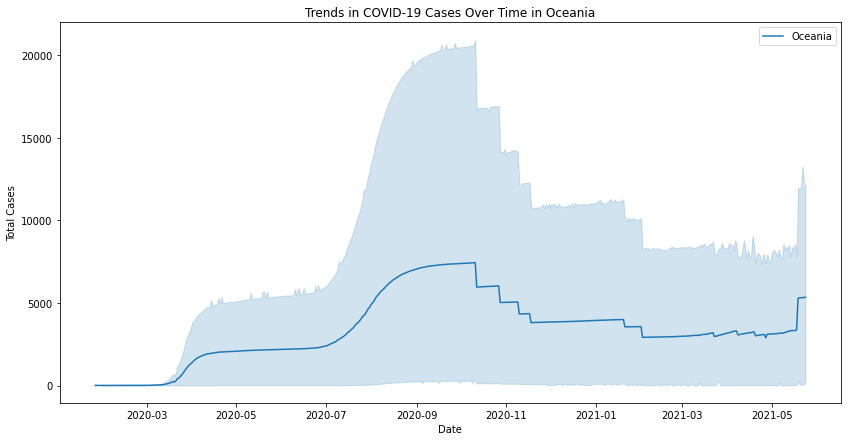

In [34]:
# Plot for all continents
continents = df['continent'].unique()
for continent in continents:
    plot_trends_by_continent(df, continent)

- The x-axis represents the date, while the y-axis shows the cumulative total cases.  

**Comparison:**  

- **Asia and Europe** generally show the highest total case counts, with multiple waves and steep increases at various points.  
- **North America** also exhibits high case numbers, with sharp rises corresponding to major pandemic waves.
- **Africa, South America, and Oceania** have lower total case counts in comparison, with Oceania showing the flattest curve, indicating fewer cases overall.
- The timing and magnitude of peaks differ between continents, reflecting differences in outbreak timing, population, interventions, and reporting.

#### *2. Deaths by Continent*

In [35]:
# Trends in COVID-19 deaths over time by continent
def plot_deaths_by_continent(df, continent):
    plt.figure(figsize=(14, 7))
    continent_data = df[df['continent'] == continent]
    sns.lineplot(data=continent_data, x='date', y='total_deaths', label=continent)
    plt.title(f'Trends in COVID-19 Deaths Over Time in {continent}')
    plt.xlabel('Date')
    plt.ylabel('Total Deaths')
    plt.legend()
    plt.show()

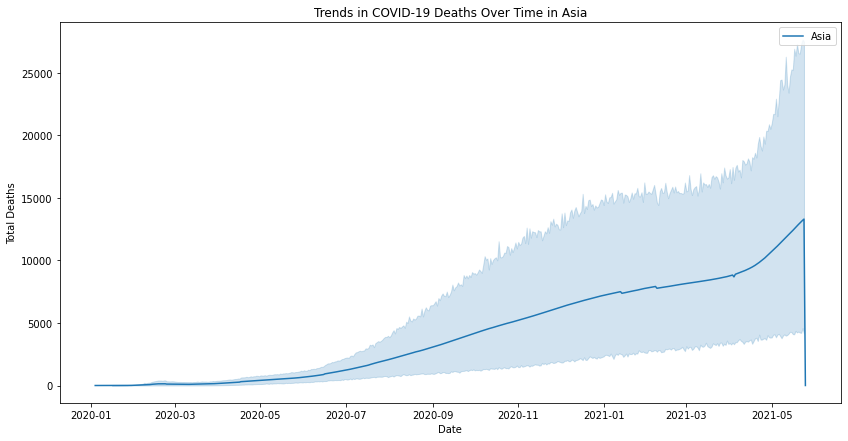

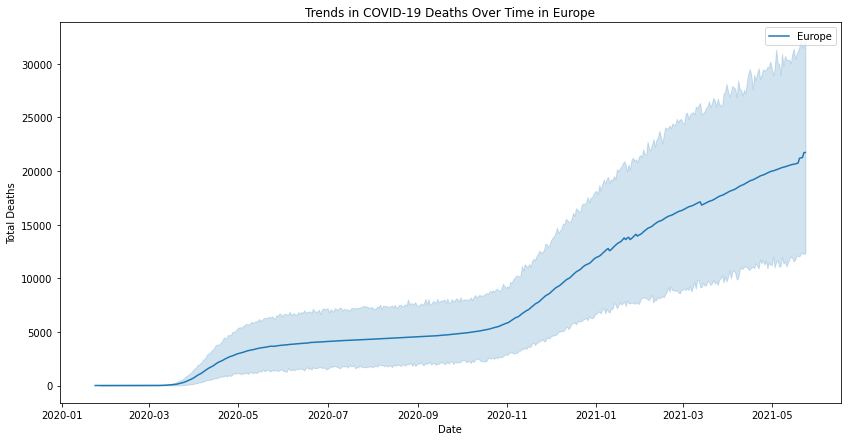

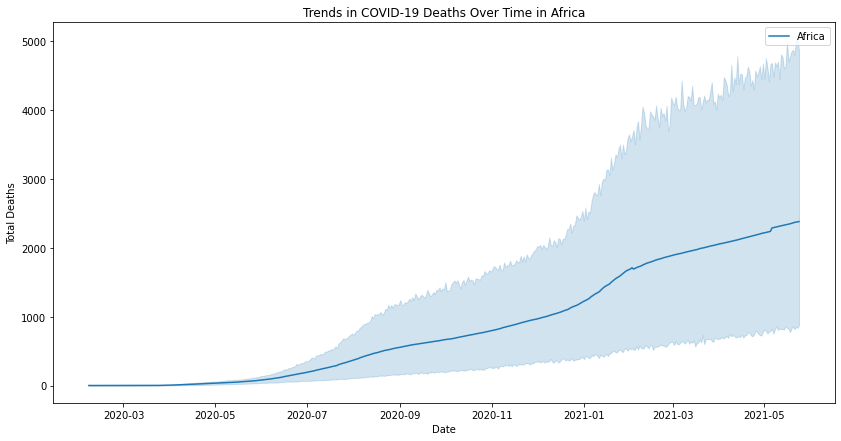

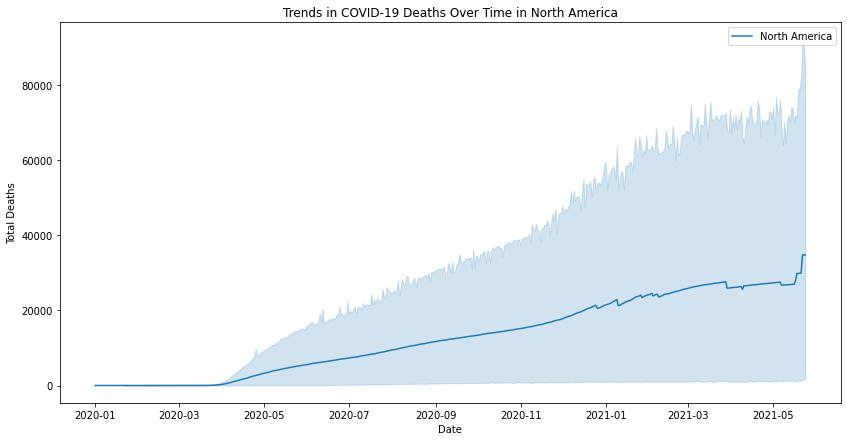

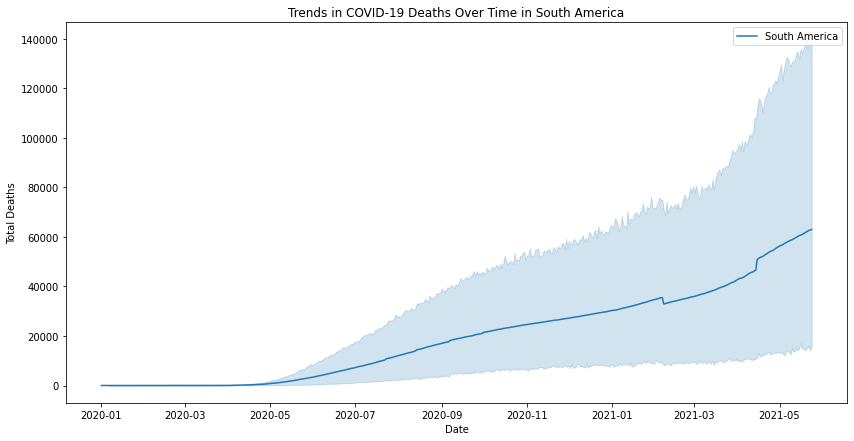

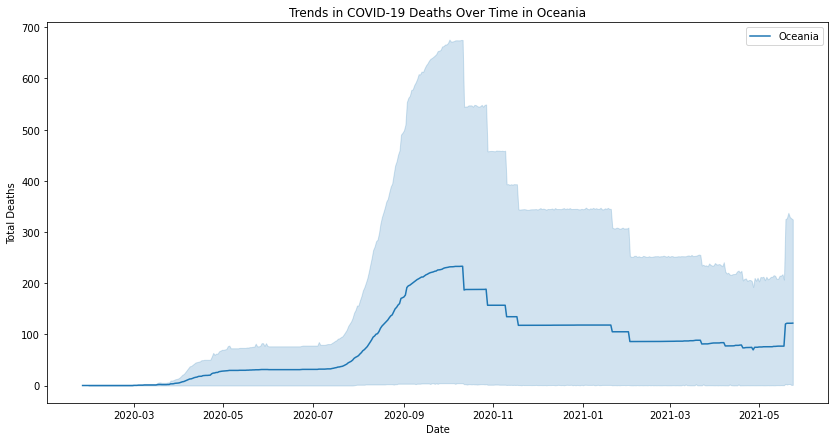

In [36]:
# Plot the trends for deaths in all continents
for continent in continents:
    plot_deaths_by_continent(df, continent)
    

- **Asia and Europe**: These continents experienced the highest cumulative deaths, with multiple sharp increases corresponding to major pandemic waves. The curves show several steep rises, indicating periods of high mortality.
- **North America**: Also displays high cumulative deaths, with pronounced peaks reflecting significant outbreaks, especially in the United States and Mexico.
- **South America**: Shows a steady increase in deaths, with some sharp rises during major waves, though overall numbers are lower than in Asia, Europe, and North America.
- **Africa**: The curve is much flatter, indicating fewer reported deaths compared to other continents. This may reflect lower case numbers, younger population, or underreporting.
- **Oceania**: Has the flattest curve, with very low cumulative deaths, likely due to effective containment, geographic isolation, and smaller population.

**Key Insights:**
- The timing and magnitude of death surges differ by continent, reflecting variations in outbreak timing, public health responses, and healthcare capacity.
- All continents show a cumulative increase, but the rate and total numbers vary widely.
- The plots highlight the disproportionate impact of COVID-19 across regions, with some continents facing much higher mortality burdens than others.

#### *3. Deaths by Country*

In [37]:
# Trends in COVID-19 deaths over time by top 5 countries
def plot_trends_by_country(df, country):
    plt.figure(figsize=(14, 7))
    country_data = df[df['location'] == country]
    sns.lineplot(data=country_data, x='date', y='total_deaths', label=country)
    plt.title(f'Trends in COVID-19 Deaths Over Time in {country}')
    plt.xlabel('Date')
    plt.ylabel('Total Deaths')
    plt.legend()
    plt.show()

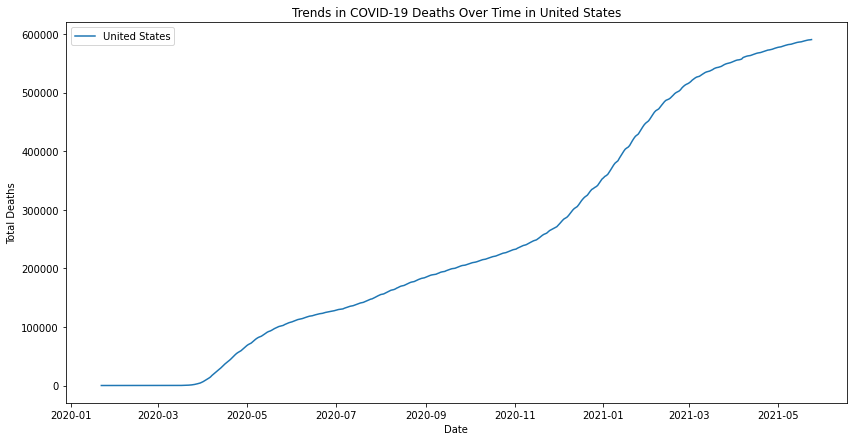

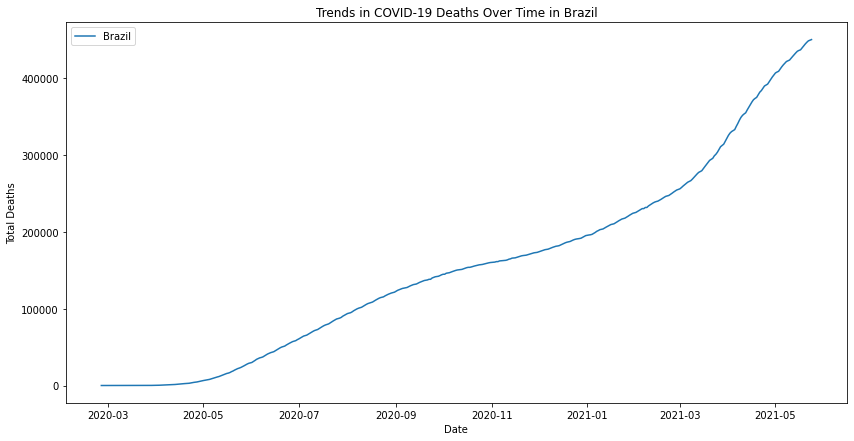

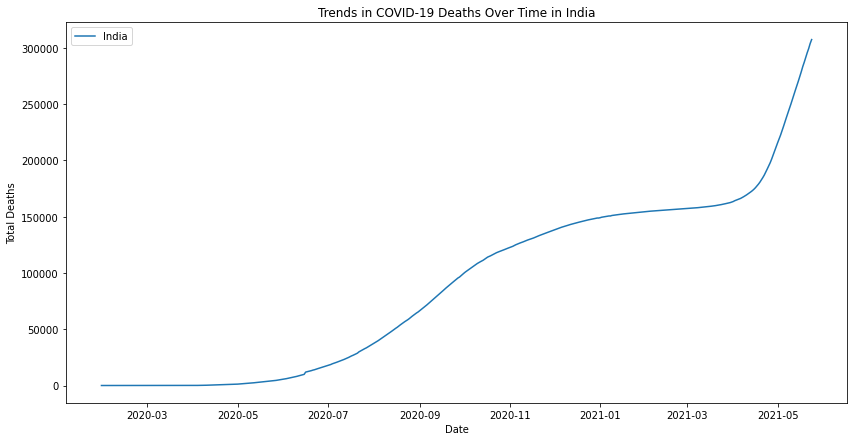

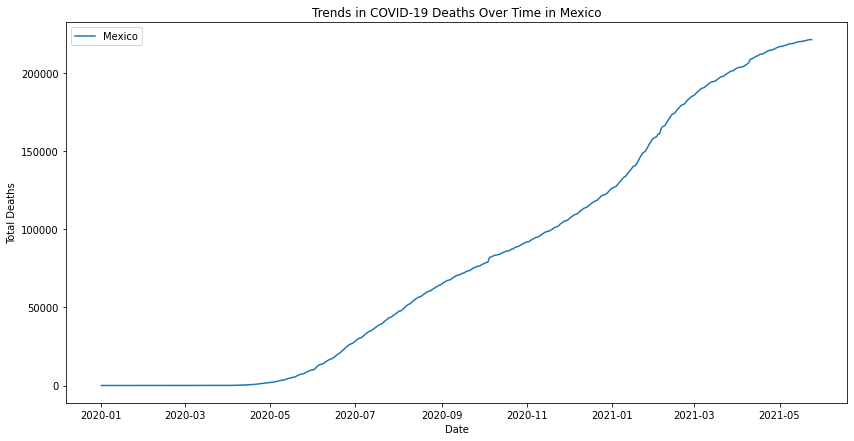

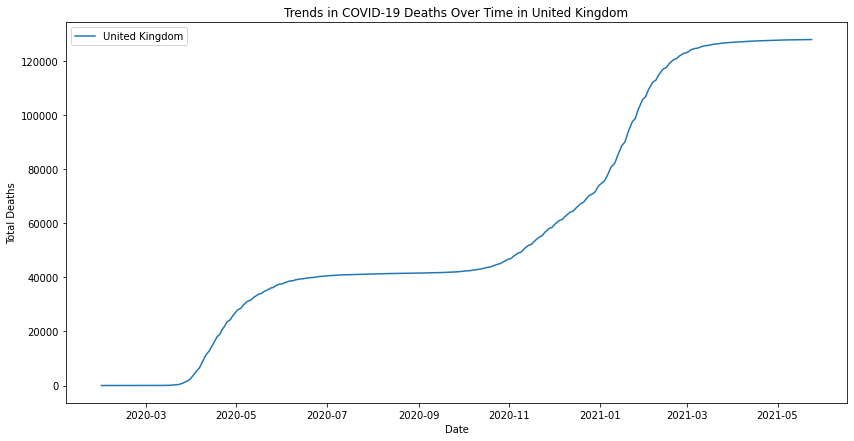

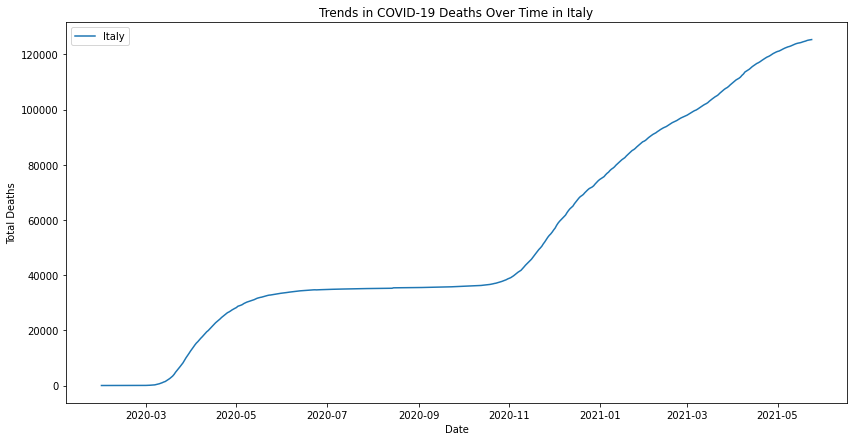

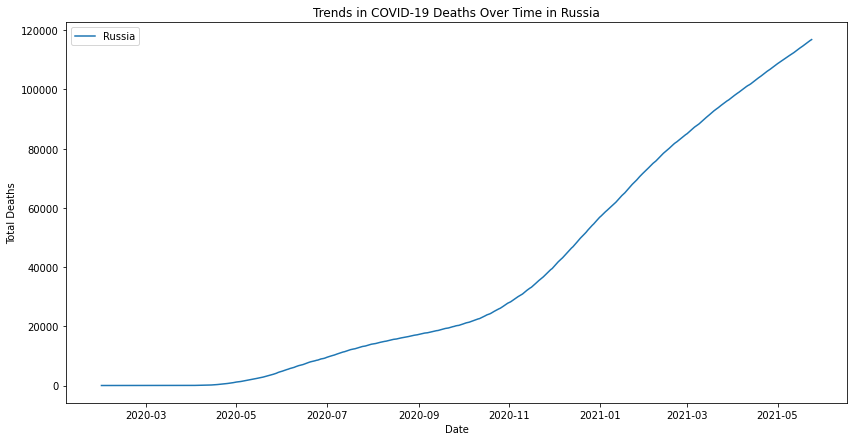

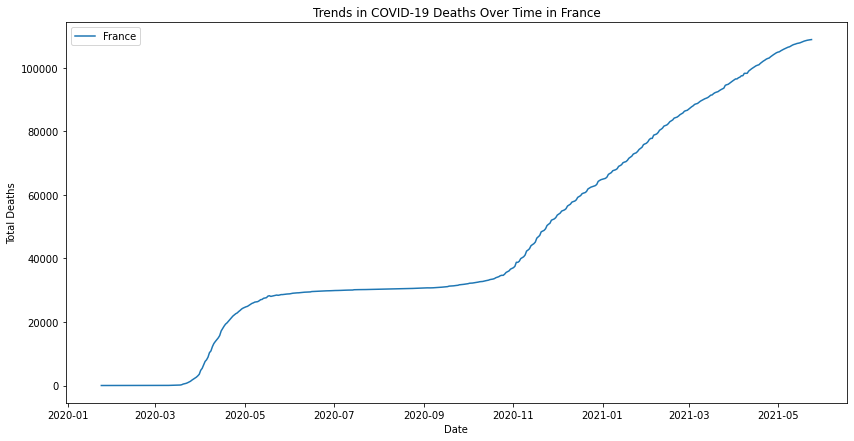

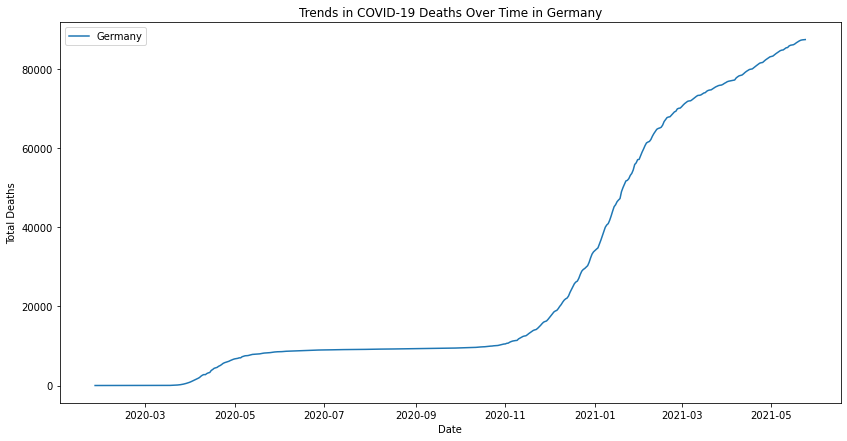

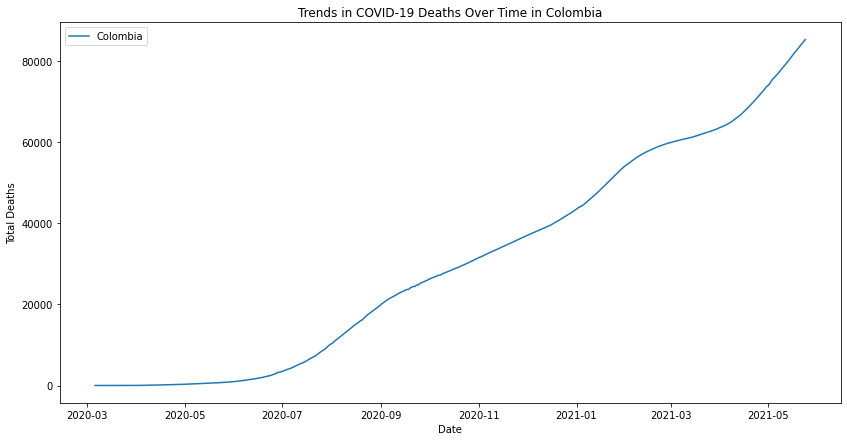

In [38]:
# Plot the trends for the top 5 countries with the highest total deaths
top_5_countries = df.groupby('location')['total_deaths'].max().nlargest(10).index
for country in top_5_countries:
    plot_trends_by_country(df, country)

**Key Observations and Country Comparison:**

- **United States, Brazil, and India** experienced the steepest and highest rises in cumulative deaths, reflecting large outbreaks and multiple severe waves.
- **Mexico and the United Kingdom** also show significant increases, but with different timing and slopes, indicating variations in outbreak peaks and response effectiveness.
- **Italy, Russia, France, Germany, and Colombia** display more gradual but still substantial increases, with some countries experiencing multiple waves.
- The timing of major surges differs: for example, Italy and the UK saw early spikes, while India and Brazil had later, sharper increases.
- The rate at which deaths accumulated varies, highlighting differences in healthcare capacity, public health interventions, and population vulnerability.

Overall, these plots reveal that while all top-affected countries faced significant mortality, the scale, timing, and progression of death tolls were highly country-specific, shaped by local factors and pandemic response strategies.

#### ***Geagraphical Analysis***

#### *Cases vs. Deaths by Country*

In [39]:
# Group and get latest total cases and deaths per country
country_cases_deaths = df.groupby(['location', 'continent', 'iso_code'])[['total_cases', 'total_deaths']].max().reset_index()

# Calculate death rate
country_cases_deaths['death_rate'] = (country_cases_deaths['total_deaths'] / country_cases_deaths['total_cases']) * 100

# Replace infinite or NaN values with 0
country_cases_deaths['death_rate'].replace([float('inf'), float('nan')], 0, inplace=True)

# Create the choropleth map with death_rate as color
fig = px.choropleth(country_cases_deaths,
                    locations="iso_code",
                    color="death_rate",
                    hover_name="location",
                    hover_data={
                        "total_cases": True,
                        "total_deaths": True,
                        "death_rate": ':.2f',
                        "iso_code": False
                    },
                    color_continuous_scale="reds",  # Red tones for fatality
                    title="COVID-19 Death Rate (%) by Country",
                    scope="world",
                    range_color=[0, country_cases_deaths['death_rate'].max()])

# Adjust layout
fig.update_layout(
    width=1200,
    height=500,
    autosize=False,
    margin=dict(l=0, r=0, t=30, b=0)
)

fig.show()

#### **Explanation:**

- `Color Intensity`: Countries with higher death rates are shown in deeper red tones, while those with lower rates appear lighter.

- `Hover Data`: When you hover over a country, you can see its name, total cases, total deaths, and the exact death rate percentage.

- `Data Source`: The data is aggregated to the latest available value for each country. The death rate is calculated as total_deaths / total_cases * 100.

#### **Comparison:**

- *High Death Rate Countries*: Some countries, especially those with limited healthcare resources or older populations, show higher death rates.

- *Low Death Rate Countries*: Countries with robust healthcare systems, younger populations, or effective pandemic responses tend to have lower death rates.

- *Geographical Patterns*: The map reveals regional disparities, with some continents or regions (e.g., parts of Europe or South America) showing higher fatality rates compared to others (e.g., Oceania or parts of Asia).

#### *Cases vs. Deaths by Continent*

In [40]:
# Group total cases and deaths by continent
continent_cases_deaths = country_cases_deaths.groupby('continent')[['total_cases', 'total_deaths']].sum().reset_index()

# Reshape data for stacked bar chart
df_long = continent_cases_deaths.melt(
    id_vars='continent',
    value_vars=['total_cases', 'total_deaths'],
    var_name='Metric',
    value_name='Count'
)

# Plot stacked bar chart
fig = px.bar(
    df_long,
    x='continent',
    y='Count',
    color='Metric',
    title='Total COVID-19 Cases and Deaths by Continent',
    barmode='stack'
)

fig.update_layout(
    width=900,
    height=500
)

fig.show()

#### *Age by Country*

In [41]:
# Get latest demographic values per country
country_demo = df.groupby(['location', 'continent', 'iso_code'])[
    ['median_age', 'aged_65_older', 'aged_70_older']
].max().reset_index()

# Define the demographic columns and colorscale
columns = ['median_age', 'aged_65_older', 'aged_70_older']
colorscale = 'Viridis'

# Initialize figure
fig = go.Figure()

# Add a choropleth trace for each demographic column
for i, col in enumerate(columns):
    fig.add_trace(go.Choropleth(
        locations=country_demo['iso_code'],
        z=country_demo[col],
        text=country_demo['location'],
        colorscale=colorscale,
        colorbar_title=col.replace('_', ' ').title(),
        visible=(i == 0),
        name=col
    ))

# Add dropdown slicer at top center
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': col.replace('_', ' ').title(),
                'method': 'update',
                'args': [
                    {'visible': [i == j for j in range(len(columns))]},
                    {'coloraxis': {'colorbar': {'title': col.replace('_', ' ').title()}}}
                ]
            }
            for i, col in enumerate(columns)
        ],
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.15,
        'yanchor': 'top'
    }],
    geo=dict(scope='world'),
    title="Select Demographic Indicator by Country",
    width=1200,
    height=600,
    margin=dict(l=0, r=0, t=80, b=0)
)

fig.show()


#### *Vaccination by Country*

In [42]:
# Group and get the latest vaccination stats per country
country_vacc = df.groupby(['location', 'continent', 'iso_code'])[['total_vaccinations', 'people_fully_vaccinated']].max().reset_index()

# Replace NaN or infinite values with 0
country_vacc[['total_vaccinations', 'people_fully_vaccinated']] = country_vacc[['total_vaccinations', 'people_fully_vaccinated']].replace([float('inf'), float('nan')], 0)

# Create the scatter geo plot
fig = px.scatter_geo(
    country_vacc,
    locations="iso_code",
    color="total_vaccinations",  # Use total_vaccinations for color intensity
    hover_name="location",
    size="people_fully_vaccinated",
    size_max=40,
    projection="natural earth",
    title="People Fully Vaccinated vs. Total Vaccinations by Country",
    color_continuous_scale="Viridis",
    hover_data={
        "total_vaccinations": True,
        "people_fully_vaccinated": True,
        "iso_code": False
    }
)

# Layout
fig.update_layout(
    width=1200,
    height=600,
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

#### *Population vs. Population Density vs. GDP Per Capita by Country*

In [43]:
# Group and get the latest values per country
country_econ = df.groupby(['location', 'continent', 'iso_code'])[
    ['population', 'population_density', 'gdp_per_capita']
].max().reset_index()

# Define metrics and colorscale
metrics = ['population', 'population_density', 'gdp_per_capita']
colorscale = 'Viridis'

# Initialize figure
fig = go.Figure()

# Add a choropleth trace for each metric
for i, metric in enumerate(metrics):
    fig.add_trace(go.Choropleth(
        locations=country_econ['iso_code'],
        z=country_econ[metric],
        text=country_econ['location'],
        colorscale=colorscale,
        colorbar_title=metric.replace('_', ' ').title(),
        visible=(i == 0),  # Only first is visible by default
        name=metric
    ))

# Add dropdown menu on the top-right
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': metric.replace('_', ' ').title(),
                'method': 'update',
                'args': [
                    {'visible': [i == j for j in range(len(metrics))]},
                    {'coloraxis': {'colorbar': {'title': metric.replace('_', ' ').title()}}}
                ]
            }
            for i, metric in enumerate(metrics)
        ],
        'direction': 'down',
        'showactive': True,
        'x': 0.7,           # Right side (close to 1)
        'xanchor': 'right',
        'y': 1.15,
        'yanchor': 'top'
    }],
    geo=dict(scope='world'),
    title="Select an Indicator to View by Country",
    width=1200,
    height=600,
    margin=dict(l=0, r=0, t=60, b=0)
)

fig.show()

#### *Vaccination progress by continent*

In [44]:
# Prepare data
continent_vacc = country_vacc.groupby('continent')[['total_vaccinations', 'people_fully_vaccinated']].sum().reset_index()
continent_vacc['partially_vaccinated'] = continent_vacc['total_vaccinations'] - continent_vacc['people_fully_vaccinated']

# Reshape for stacked bar
df_long = continent_vacc.melt(id_vars='continent',
                              value_vars=['people_fully_vaccinated', 'partially_vaccinated'],
                              var_name='Status',
                              value_name='Count')

# Plot
fig = px.bar(df_long, x='continent', y='Count', color='Status',
             title='Vaccination Progress by Continent',
             barmode='stack')

fig.show()

In [45]:
def correlation_analysis(df, col1, col2):
    """
    Computes and prints the Pearson correlation coefficient between two columns of a DataFrame.
    Also returns the correlation value.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        col1 (str): Name of the first column.
        col2 (str): Name of the second column.

    Returns:
        float: Pearson correlation coefficient.
    """
    corr = df[[col1, col2]].corr(method='pearson').iloc[0, 1]
    print(f"Pearson correlation between '{col1}' and '{col2}': {corr:.4f}")
    return corr

#### *Total Cases vs. Total Deaths*

In [46]:
correlation_analysis(df, 'total_cases', 'total_deaths')

Pearson correlation between 'total_cases' and 'total_deaths': 0.9405


0.9404639190416837

#### *Total Cases vs. Stringency Index*

In [47]:
correlation_analysis(df, 'total_cases', 'stringency_index')

Pearson correlation between 'total_cases' and 'stringency_index': 0.0885


0.08847915824262349

#### *Total Cases vs. Human Development Index*

In [48]:
correlation_analysis(df, 'total_cases', 'human_development_index')

Pearson correlation between 'total_cases' and 'human_development_index': 0.1105


0.11054829579210396

### ***Conclusions***

1. *Global Spread and Impact*:  
    - COVID-19 affected all continents, but the magnitude varied. Asia and Europe recorded the highest total cases, while Oceania had the lowest.
    - Death rates also varied, with Europe and the Americas experiencing the highest absolute numbers.

2. *Temporal Trends*:  
    - Multiple waves were observed, with timing and severity differing by continent.  
    - Asia, Europe, and North America had pronounced peaks, reflecting major pandemic waves.

3. *Geographical Differences*:  
    - Countries within the same continent showed significant disparities in cases, deaths, and death rates.
    - Some countries had notably higher fatality rates, possibly due to healthcare capacity, demographics, or reporting practices.

4. *Demographics and Outcomes*:  
    - Countries with older populations (higher median age, more aged 65+ and 70+) tended to have higher death rates, highlighting vulnerability among the elderly.

5. *Vaccination Progress*:  
    - Vaccination rates varied widely. Europe and North America led in both total and fully vaccinated populations, while Africa lagged behind.
    - Higher vaccination coverage correlated with lower recent death rates in some regions.

6. *Socioeconomic Factors*:  
    - Higher GDP per capita and human development index were generally associated with better outcomes, but not universally so.
    - Population density did not always correlate with higher case counts, suggesting the importance of interventions and healthcare infrastructure.

7. *Correlation Analysis*:  
    - Strong positive correlation between total cases and total deaths.
    - Weak or moderate correlation between cases and stringency index/human development index, indicating that multiple factors influence pandemic outcomes.

---

### ***Recommendations***

1. *Strengthen Healthcare Systems*:  
    - Invest in healthcare infrastructure, especially in regions with high fatality rates and low resources.

2. *Targeted Vaccination Campaigns*:  
    - Prioritize vaccine distribution to vulnerable populations and under-vaccinated regions, particularly in Africa and parts of Asia.

3. *Protect the Elderly*:  
    - Implement focused interventions for older adults, including booster vaccinations and enhanced protective measures.

4. *Data Transparency and Reporting*:  
    - Encourage accurate and timely data reporting to better inform public health responses.

5. *Socioeconomic Support*:  
    - Support low-income countries with financial and technical resources to improve pandemic response and recovery.

6. *Preparedness for Future Waves*:  
    - Maintain readiness for new variants and potential future waves through surveillance, rapid response, and public health education.

7. *Global Collaboration*:  
    - Foster international cooperation for equitable vaccine access, research, and sharing of best practices.